# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

## Exploring the data
#### 1. Know the dataset 

In [2]:
df = pd.read_csv('/kaggle/input/top-hits-spotify-from-20002019/songs_normalize.csv')
df[df.columns[:9]].head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8


In [3]:
df[df.columns[9:]].head()

,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [4]:
print(f'The shape of the dataset: {df.shape}')
print(f'The size of the dataset: {df.size}')

The shape of the dataset: (2000, 18)
The size of the dataset: 36000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [6]:
# Summary statisitcs 
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667438,0.720366,5.378000,-5.512434,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122557
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


### 2. Data cleaning

In [7]:
df.isna().sum()/len(df)*100

artist              0.0
song                0.0
duration_ms         0.0
explicit            0.0
year                0.0
popularity          0.0
danceability        0.0
energy              0.0
key                 0.0
loudness            0.0
mode                0.0
speechiness         0.0
acousticness        0.0
instrumentalness    0.0
liveness            0.0
valence             0.0
tempo               0.0
genre               0.0
dtype: float64

In [8]:
column = df.columns
column

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [9]:
# Determine the duplicated values
df.duplicated().sum()

59

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
'''We can check if there is still any duplicated value in our data or not by ussing "assert" keyword.
- if the condition is true, it will get nothing.
- if the condition is False, it will get an error.
'''
assert df.duplicated().sum() == 0

In [12]:
df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [13]:
df.genre.unique()

array(['pop', 'rock, pop', 'pop, country', 'rock, metal',
       'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B',
       'Dance/Electronic', 'pop, Dance/Electronic',
       'rock, Folk/Acoustic, easy listening', 'metal', 'hip hop, pop',
       'R&B', 'pop, latin', 'Folk/Acoustic, rock',
       'pop, easy listening, Dance/Electronic', 'rock',
       'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
       'hip hop, R&B', 'pop, Folk/Acoustic', 'set()',
       'hip hop, pop, latin', 'hip hop, Dance/Electronic',
       'hip hop, pop, rock', 'World/Traditional, Folk/Acoustic',
       'Folk/Acoustic, pop', 'rock, easy listening',
       'World/Traditional, hip hop', 'hip hop, pop, R&B, latin',
       'rock, blues', 'rock, R&B, Folk/Acoustic, pop', 'latin',
       'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
       'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
       'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic',
       'countr

In [14]:
df.genre.value_counts()

genre
pop                                      416
hip hop, pop                             267
hip hop, pop, R&B                        236
pop, Dance/Electronic                    216
pop, R&B                                 172
hip hop                                  121
hip hop, pop, Dance/Electronic            75
rock                                      57
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
set()                                     22
latin                                     15
hip hop, Dance/Electronic                 15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
metal                                      9
hip hop, pop, rock                         9
coun

In [15]:
genre_set = df[df['genre'].str.contains('set()')]
genre_set

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
95,Wheatus,Teenage Dirtbag,241666,True,1999,71,0.625,0.850,4,-3.904,1,0.0495,0.346000,0.000233,0.1740,0.633,94.661,set()
216,Las Ketchup,The Ketchup Song (Aserejé) - Spanglish Version,213973,False,2002,66,0.607,0.923,1,-6.777,1,0.0948,0.019300,0.000001,0.0924,0.868,184.819,set()
291,Blazin' Squad,Crossroads - Radio Edit,188693,False,2012,40,0.661,0.746,4,-5.153,1,0.0420,0.109000,0.000000,0.3250,0.502,144.188,set()
428,George Michael,Amazing,265826,False,2004,57,0.805,0.754,10,-6.825,0,0.0394,0.088400,0.000002,0.1170,0.880,128.429,set()
455,DJ Casper,Cha Cha Slide - Hardino Mix,222146,False,2004,51,0.853,0.911,11,-6.722,0,0.1250,0.043600,0.005710,0.2870,0.802,131.012,set()
481,Eamon,Fuck It (I Don't Want You Back),225106,True,2004,64,0.828,0.653,0,-6.245,0,0.0653,0.214000,0.000003,0.0404,0.575,68.507,set()
545,Brian McFadden,Almost Here,229826,False,2004,42,0.561,0.452,9,-7.324,0,0.0336,0.409000,0.000000,0.1060,0.316,77.984,set()
645,Meck,Thunder in My Heart Again (Radio Edit),189800,False,2005,46,0.679,0.922,2,-4.670,0,0.0294,0.000241,0.690000,0.0697,0.806,129.016,set()
710,Ida Corr,Let Me Think About It,151973,False,2012,43,0.762,0.754,0,-3.425,0,0.0460,0.000220,0.066500,0.1460,0.715,129.026,set()
729,Camille Jones,The Creeps - Fedde Le Grand Radio Mix,152333,False,2006,17,0.847,0.861,6,-6.632,1,0.0603,0.278000,0.029000,0.0626,0.724,127.894,set()


In [16]:
genres = [
    "Alternative Rock",  # Wheatus - Teenage Dirtbag
    "Pop",  # Las Ketchup - The Ketchup Song (Aserejé) - Spanglish Version
    "Hip Hop",  # Blazin' Squad - Crossroads - Radio Edit
    "Pop",  # George Michael - Amazing
    "Dance",  # DJ Casper - Cha Cha Slide - Hardino Mix
    "R&B",  # Eamon - Fuck It (I Don't Want You Back)
    "Pop",  # Brian McFadden - Almost Here
    "Dance",  # Meck - Thunder in My Heart Again (Radio Edit)
    "Dance",  # Ida Corr - Let Me Think About It
    "Dance",  # Camille Jones - The Creeps - Fedde Le Grand Radio Mix
    "Pop",  # Elliott Yamin - Wait for You
    "Hip Hop",  # Wyclef Jean - Sweetest Girl (Dollar Bill)
    "World Music",  # A.R. Rahman - Jai Ho! (You Are My Destiny)
    "Hip Hop",  # K'NAAN - Wavin' Flag
    "Indie Pop",  # Gotye - Somebody That I Used To Know
    "Soul",  # John Newman - Love Me Again
    "Reggae Fusion",  # MAGIC! - Rude
    "Alternative Rock",  # Milky Chance - Stolen Dance
    "R&B",  # Natalie La Rose - Somebody
    "Hip Hop",  # Zay Hilfigerrr - Juju on That Beat (TZ Anthem)
    "Hip Hop",  # EO - German
    "Pop"  # Ashley O - On A Roll
]
genre_series = pd.Series(genres)
genre_series

0     Alternative Rock
1                  Pop
2              Hip Hop
3                  Pop
4                Dance
5                  R&B
6                  Pop
7                Dance
8                Dance
9                Dance
10                 Pop
11             Hip Hop
12         World Music
13             Hip Hop
14           Indie Pop
15                Soul
16       Reggae Fusion
17    Alternative Rock
18                 R&B
19             Hip Hop
20             Hip Hop
21                 Pop
dtype: object

In [17]:
genre_set.genre.index

Index([  95,  216,  291,  428,  455,  481,  545,  645,  710,  729,  793,  794,
        949, 1057, 1271, 1320, 1406, 1454, 1487, 1773, 1841, 1976],
      dtype='int64')

In [18]:
genre_set_rst = genre_set.reset_index()
genre_set_rst

,index,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,95,Wheatus,Teenage Dirtbag,241666,True,1999,71,0.625,0.850,4,-3.904,1,0.0495,0.346000,0.000233,0.1740,0.633,94.661,set()
1,216,Las Ketchup,The Ketchup Song (Aserejé) - Spanglish Version,213973,False,2002,66,0.607,0.923,1,-6.777,1,0.0948,0.019300,0.000001,0.0924,0.868,184.819,set()
2,291,Blazin' Squad,Crossroads - Radio Edit,188693,False,2012,40,0.661,0.746,4,-5.153,1,0.0420,0.109000,0.000000,0.3250,0.502,144.188,set()
3,428,George Michael,Amazing,265826,False,2004,57,0.805,0.754,10,-6.825,0,0.0394,0.088400,0.000002,0.1170,0.880,128.429,set()
4,455,DJ Casper,Cha Cha Slide - Hardino Mix,222146,False,2004,51,0.853,0.911,11,-6.722,0,0.1250,0.043600,0.005710,0.2870,0.802,131.012,set()
5,481,Eamon,Fuck It (I Don't Want You Back),225106,True,2004,64,0.828,0.653,0,-6.245,0,0.0653,0.214000,0.000003,0.0404,0.575,68.507,set()
6,545,Brian McFadden,Almost Here,229826,False,2004,42,0.561,0.452,9,-7.324,0,0.0336,0.409000,0.000000,0.1060,0.316,77.984,set()
7,645,Meck,Thunder in My Heart Again (Radio Edit),189800,False,2005,46,0.679,0.922,2,-4.670,0,0.0294,0.000241,0.690000,0.0697,0.806,129.016,set()
8,710,Ida Corr,Let Me Think About It,151973,False,2012,43,0.762,0.754,0,-3.425,0,0.0460,0.000220,0.066500,0.1460,0.715,129.026,set()
9,729,Camille Jones,The Creeps - Fedde Le Grand Radio Mix,152333,False,2006,17,0.847,0.861,6,-6.632,1,0.0603,0.278000,0.029000,0.0626,0.724,127.894,set()


In [19]:
for i in range(len(genre_set_rst.genre)):
    df.genre.replace({"set()":genre_series[i]}, inplace = True)

In [20]:
# Check if there is 'set()' values un our data or not.
sum_set = df['genre'] == 'set()'
sum_set.sum()

0

In [21]:
df.genre.value_counts(dropna = False)

genre
pop                                      416
hip hop, pop                             267
hip hop, pop, R&B                        236
pop, Dance/Electronic                    216
pop, R&B                                 172
hip hop                                  121
hip hop, pop, Dance/Electronic            75
rock                                      57
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
Alternative Rock                          22
latin                                     15
hip hop, Dance/Electronic                 15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
metal                                      9
hip hop, pop, rock                         9
coun

In [22]:
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [23]:
df['artist'].nunique()

835

In [24]:
artists = df['artist'].value_counts()
artists.head()

artist
Drake             23
Rihanna           23
Eminem            21
Calvin Harris     20
Britney Spears    19
Name: count, dtype: int64

In [25]:
artists_1 = artists.loc[lambda x:x == 1]
artists_1

artist
Philip George       1
BTS                 1
AJ Tracey           1
Robin Schulz        1
Lost Frequencies    1
                   ..
Big Tymers          1
DJ Sammy            1
Cam’ron             1
Mumford & Sons      1
Blanco Brown        1
Name: count, Length: 504, dtype: int64

In [26]:
len(artists) - len(artists_1)

331

In [27]:
slices = [len(artists_1), len(artists) - len(artists_1)]

Text(0.5, 1.0, 'Artists with 1 Top Hit VS Artists with more than 1 Top Hit')

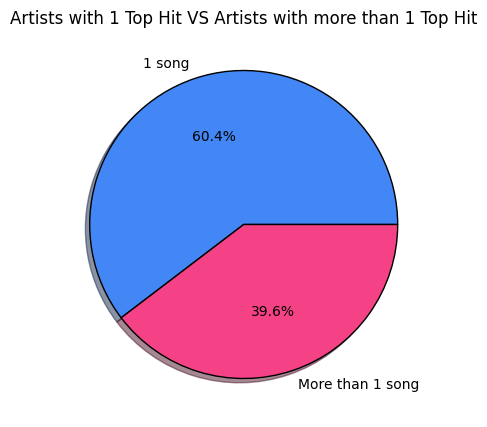

In [28]:
plt.figure(figsize = (5,5))
plt.pie(slices,labels = ['1 song','More than 1 song'], autopct = '%1.1f%%',
        wedgeprops = {"edgecolor":"black"}, shadow = True, colors = ['#4287f5', '#f54287'])
plt.title("Artists with 1 Top Hit VS Artists with more than 1 Top Hit")

In [29]:
# Get the songs with the same artist.
df_artist = df.groupby(['artist','song'])
df_artist.first().head(20)
# We will get the dataset with sorted by the index of artist values.

duration_ms  explicit  year  \
artist       song                                                        
*NSYNC       Bye Bye Bye                        200560     False  2000   
             Girlfriend                         253600     False  2001   
             Gone                               292000     False  2001   
             It's Gonna Be Me                   191040     False  2000   
112          It's Over Now                      264933     False  2001   
             Peaches & Cream                    193093     False  2001   
2 Chainz     It's A Vibe                        210200      True  2017   
             We Own It (Fast & Furious)         227906     False  2013   
21 Savage    Bank Account                       220306      True  2017   
             a lot                              288624      True  2018   
2Pac         Ghetto Gospel                      238053      True  2004   
             Until The End Of Time              266506      True  2001   
3 Doors Down Here Without You                   238733     False  2002   
             It's Not My Time                   241960     False  2008   
             Kryptonite                         233933     False  2000   
             Let Me Go                          243053     False  2012   
             When I'm Gone                      260333     False  2002   
3LW          No More (Baby I'ma Do Right)       263440     False  2000   
3OH!3        DONTTRUSTME                        192573      True  2008   
             My First Kiss (feat. Ke$ha)        192440     False  2010   

                                           popularity  danceability  energy  \
artist       song                                                             
*NSYNC       Bye Bye Bye                           65         0.614   0.928   
             Girlfriend                            50         0.745   0.807   
             Gone                                  45         0.699   0.403   
             It's Gonna Be Me                      60         0.644   0.874   
112          It's Over Now                         57         0.660   0.710   
             Peaches & Cream                       63         0.677   0.520   
2 Chainz     It's A Vibe                           71         0.822   0.502   
             We Own It (Fast & Furious)            69         0.563   0.902   
21 Savage    Bank Account                          74         0.884   0.347   
             a lot                                 78         0.837   0.636   
2Pac         Ghetto Gospel                         68         0.794   0.614   
             Until The End Of Time                 57         0.757   0.706   
3 Doors Down Here Without You                      74         0.557   0.533   
             It's Not My Time                      56         0.529   0.934   
             Kryptonite                            78         0.545   0.865   
             Let Me Go                             52         0.478   0.863   
             When I'm Gone                         67         0.530   0.768   
3LW          No More (Baby I'ma Do Right)          56         0.721   0.723   
3OH!3        DONTTRUSTME                           70         0.791   0.713   
             My First Kiss (feat. Ke$ha)           62         0.682   0.889   

                                           key  loudness  mode  speechiness  \
artist       song                                                             
*NSYNC       Bye Bye Bye                     8    -4.806     0       0.0516   
             Girlfriend                      0    -5.191     0       0.0884   
             Gone                           11    -8.564     0       0.0614   
             It's Gonna Be Me                0    -4.666     0       0.0801   
112          It's Over Now                   1    -4.541     1       0.0409   
             Peaches & Cream                 4    -6.255     0       0.3340   
2 Chainz     It's A Vibe                   

In [30]:
artist_num = df['artist'].value_counts()
artist_num

artist
Drake             23
Rihanna           23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Big Tymers         1
DJ Sammy           1
Cam’ron            1
Mumford & Sons     1
Blanco Brown       1
Name: count, Length: 835, dtype: int64

In [31]:
# Top 10 artists who make songs.
top_25 = artist_num[:26]
top_25

artist
Drake                23
Rihanna              23
Eminem               21
Calvin Harris        20
Britney Spears       19
David Guetta         18
Chris Brown          16
Katy Perry           16
Taylor Swift         16
Beyoncé              16
Kanye West           16
P!nk                 14
Black Eyed Peas      14
Ariana Grande        13
Maroon 5             13
JAY-Z                12
Nelly                11
Jason Derulo         11
Coldplay             11
Usher                11
Bruno Mars           11
Justin Timberlake    11
Lady Gaga            10
Flo Rida             10
Avril Lavigne        10
Jennifer Lopez       10
Name: count, dtype: int64

Text(0.5, 1.0, 'The most 25 singing artists')

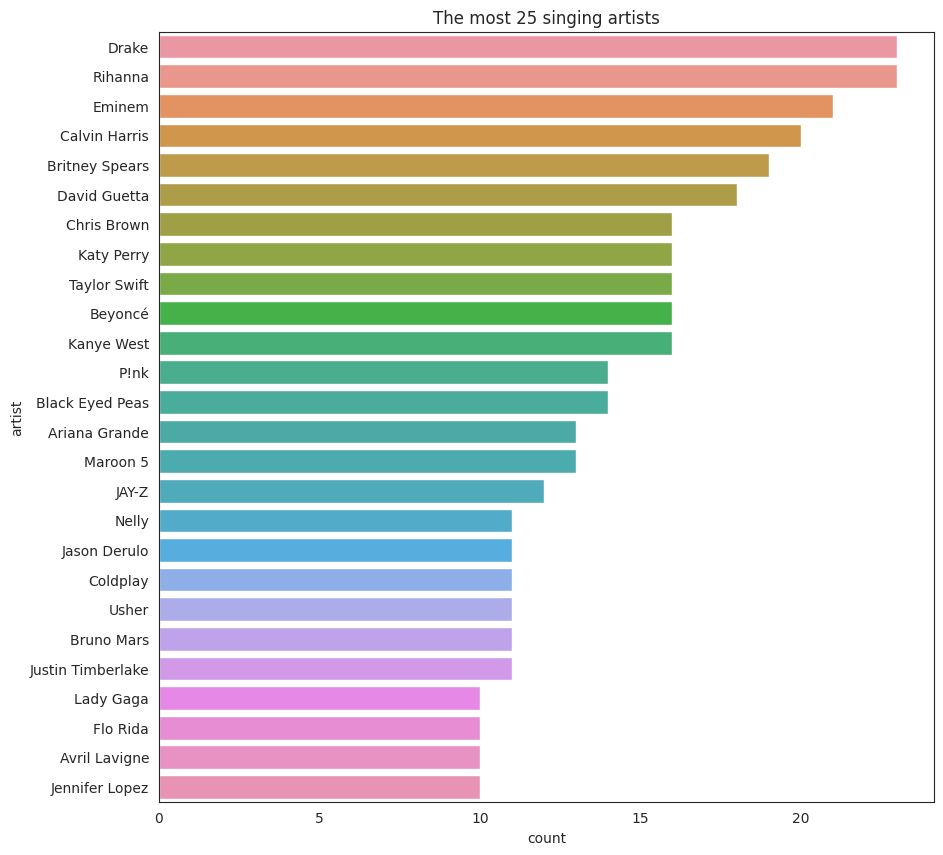

In [32]:
sns.set_style('white')
plt.figure(figsize=(10,10))
sns.barplot(data = df, y = top_25.index, x = top_25)
plt.title('The most 25 singing artists')

In [33]:
# Know if the songs have an offensive contents or not.
df['explicit'] = df['explicit'].astype('int64')
df_explicit = pd.DataFrame(df.groupby(['artist'])['explicit'].mean())

df_explicit = df_explicit.reset_index()
df_explicit

,artist,explicit
0,*NSYNC,0.0
1,112,0.0
2,2 Chainz,0.5
3,21 Savage,1.0
4,2Pac,1.0
...,...,...
830,girl in red,0.0
831,iann dior,0.5
832,iio,0.0
833,t.A.T.u.,1.0


In [34]:
df.explicit.value_counts()

explicit
0    1404
1     537
Name: count, dtype: int64

Note: We will show the artists that are suitable for listening, and that is by making a relationship between the number of songs
they made and its contents.

In [35]:
threshold = 0.5
for i, val in enumerate(df_explicit.explicit):
    if val < threshold :
        df_explicit.loc[i,'suitability']= 'suitable'
    # if val == threshold:
      #  df_explicit.loc[i,'suitability'] = 'may be suitable'
    else:
        df_explicit.loc[i,'suitability'] = 'unsuitable'

df_explicit

,artist,explicit,suitability
0,*NSYNC,0.0,suitable
1,112,0.0,suitable
2,2 Chainz,0.5,unsuitable
3,21 Savage,1.0,unsuitable
4,2Pac,1.0,unsuitable
...,...,...,...
830,girl in red,0.0,suitable
831,iann dior,0.5,unsuitable
832,iio,0.0,suitable
833,t.A.T.u.,1.0,unsuitable


In [36]:
df_explicit.suitability.unique()

array(['suitable', 'unsuitable'], dtype=object)

Text(0.5, 1.0, 'Suitable and Unsuitable artist')

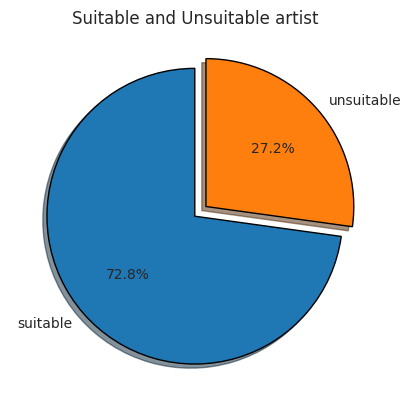

In [37]:
# We can determine the suitable artist to listen by children by the contents in the songs.
plt.pie(df_explicit.suitability.value_counts(),labels = df_explicit.suitability.unique(), autopct = '%1.1f%%', wedgeprops = {'edgecolor':"black"},
        shadow = True, startangle = 90, explode = (0,0.1))
plt.title('Suitable and Unsuitable artist')

In [38]:
df_explicit.loc[(df_explicit.suitability == 'unsuitable') & (df_explicit.explicit == 0.5), 'suitability'] = 'may be suitable'
df_explicit

,artist,explicit,suitability
0,*NSYNC,0.0,suitable
1,112,0.0,suitable
2,2 Chainz,0.5,may be suitable
3,21 Savage,1.0,unsuitable
4,2Pac,1.0,unsuitable
...,...,...,...
830,girl in red,0.0,suitable
831,iann dior,0.5,may be suitable
832,iio,0.0,suitable
833,t.A.T.u.,1.0,unsuitable


In [39]:
df_explicit['suitability'].unique()

array(['suitable', 'may be suitable', 'unsuitable'], dtype=object)

Text(0.5, 1.0, 'Suitable and Unsuitable artist')

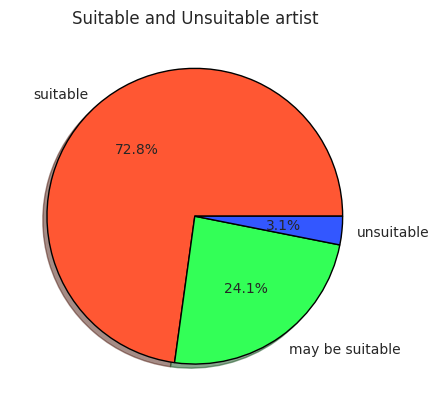

In [40]:
plt.pie(df_explicit.suitability.value_counts(), labels = df_explicit.suitability.unique(), wedgeprops = {"edgecolor":"k"},
        colors = ["#FF5733", "#33FF57", "#3357FF"], autopct = '%1.1f%%', shadow = True)
plt.title('Suitable and Unsuitable artist')

## song Popularity 


In [41]:
df.loc[:,"popularity"].unique()

array([77, 79, 66, 78, 65, 69, 86, 68, 75,  1, 56, 55, 62, 61, 53, 64, 73,
       82, 83, 54, 72, 47, 71, 49, 58, 52, 59, 36, 43, 60, 63,  0, 70, 57,
       76, 74, 50, 42, 48, 67, 26, 46, 51, 30, 45, 87, 27, 85, 40,  2, 80,
       35, 24, 32, 81, 39,  3, 38, 44, 11, 16, 33, 37, 28,  4, 21, 41, 34,
       17, 18,  6, 88, 89, 84,  8,  7])

In [42]:
threshold = 50
# Popular_song = pd.Series()
# unpopular_song = pd.Series()
# for i in range(len(df.popularity)):
#    if df.popularity.values[i] < threshold:
#       popular_song = df.song[i]
#    else: 
#        unpopular_song = df.song[i]
    

In [43]:
popular_song_filtering = df[df.popularity > threshold].sort_values(by = "popularity",ascending = False)
popular_song = popular_song_filtering['song']
unpopular_song = df[df.popularity < threshold]['song']
print("\n",popular_song,'\n','_'*60)
print('\n',unpopular_song)


 1322          Sweater Weather
1311             Another Love
201                Without Me
1613           Wait a Minute!
1819     lovely (with Khalid)
                ...          
1095    Live Like We're Dying
1242                I Love It
953                  Break Up
183                21 Seconds
1756                     Mama
Name: song, Length: 1610, dtype: object 
 ____________________________________________________________

 10                                       L'Amour Toujours
29                                          Don't Give Up
31                                          Dance with Me
42      Bounce With Me (feat. Xscape) - Edited Album V...
44                                               Hot Boyz
                              ...                        
1966                                             Thotiana
1970                          Boy With Luv (feat. Halsey)
1973                                               Easier
1986                                     

In [44]:
df.popularity.value_counts()

popularity
0     126
69     74
68     73
73     67
74     65
     ... 
88      1
89      1
87      1
8       1
7       1
Name: count, Length: 76, dtype: int64

In [45]:
popular_song.value_counts()

song
Sorry                       4
Higher                      3
Closer                      3
I Like It                   3
I Knew You Were Trouble.    2
                           ..
Gangnam Style (강남스타일)       1
River (feat. Ed Sheeran)    1
Down On Me                  1
Take A Look Around          1
Mama                        1
Name: count, Length: 1569, dtype: int64

Text(0.5, 1.0, 'Top 50 popular songs')

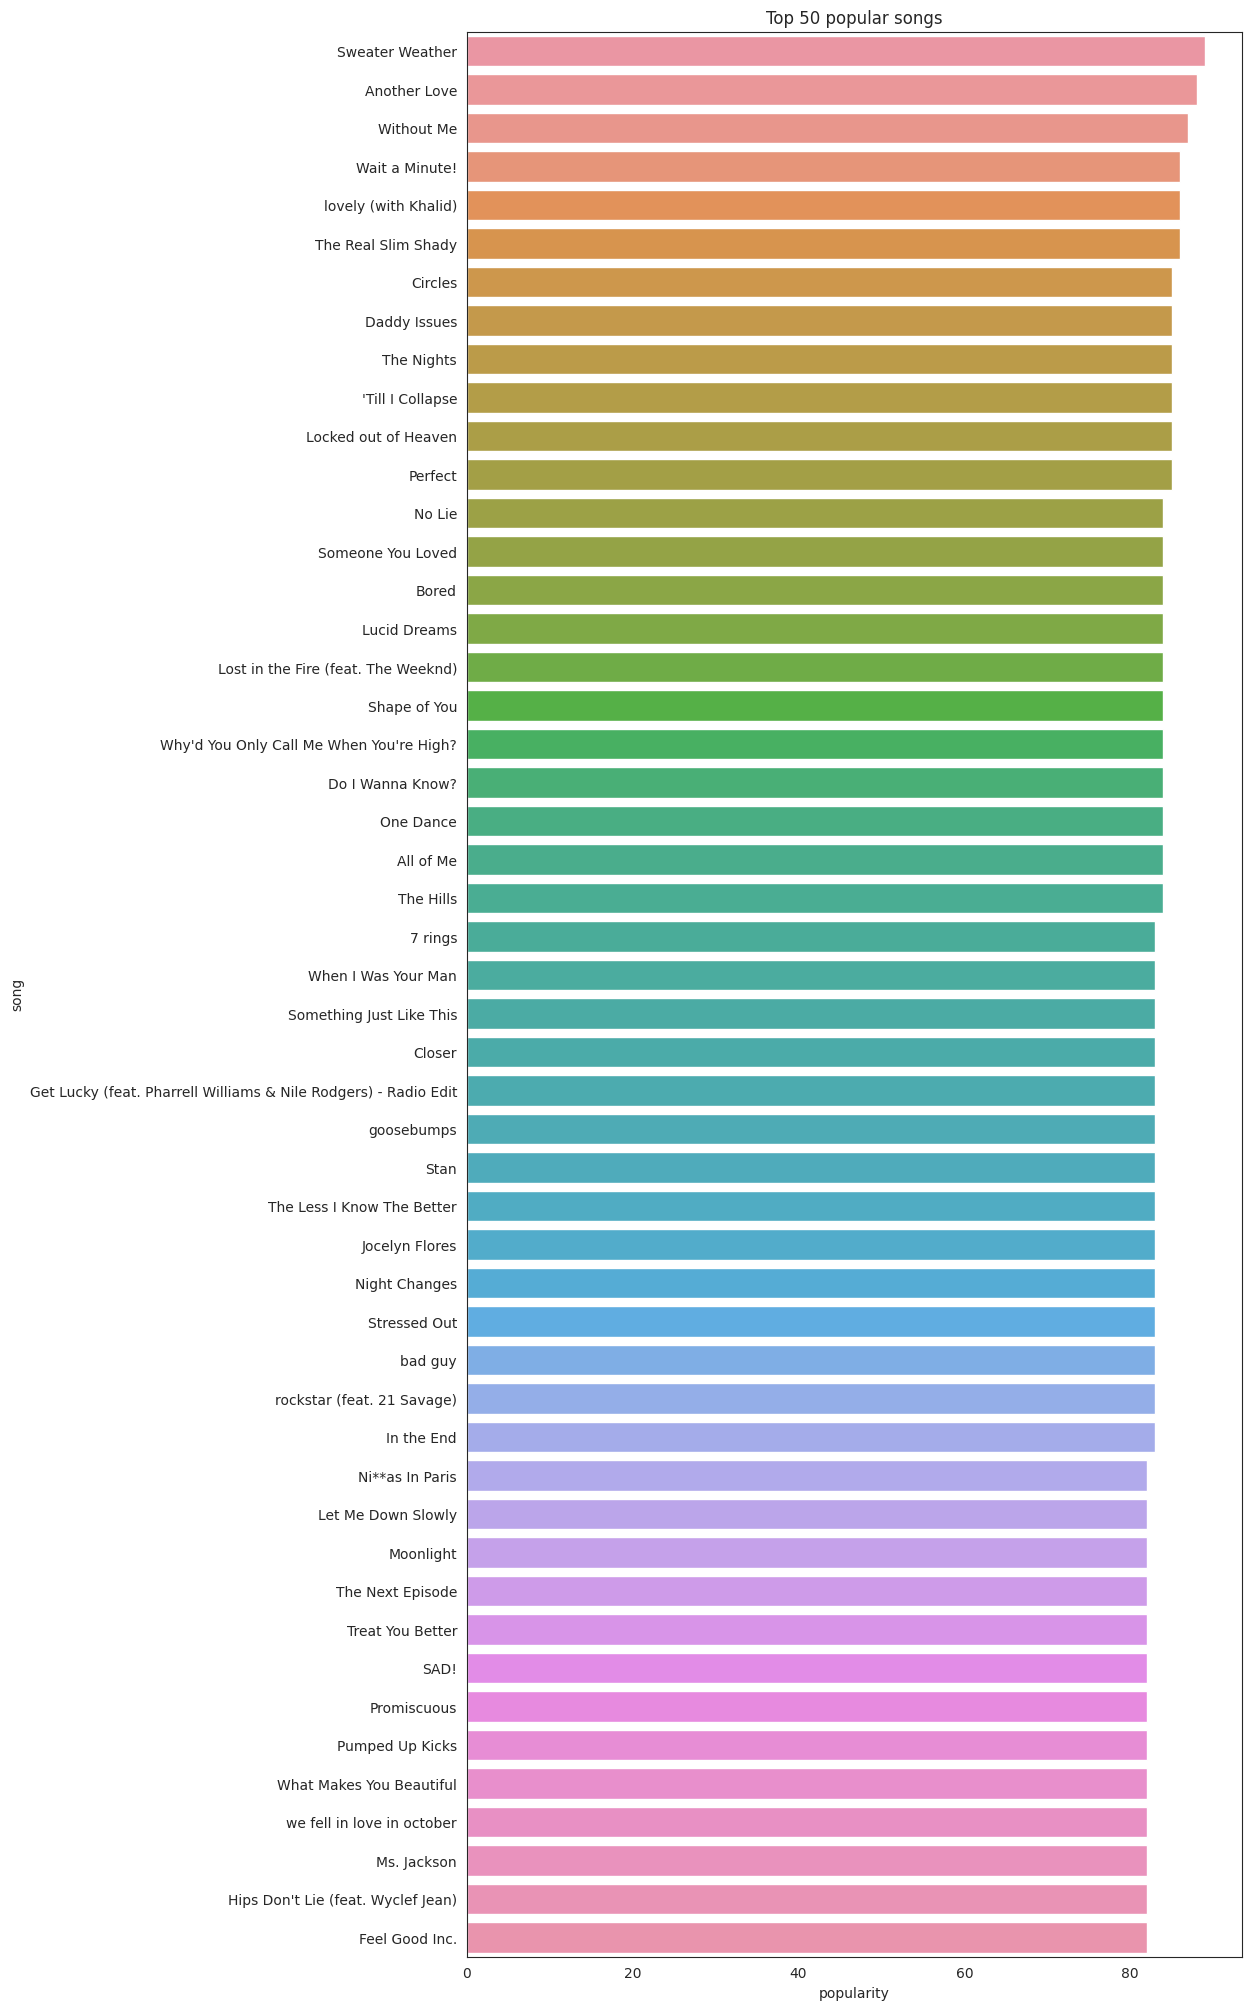

In [46]:
plt.figure(figsize=(10,25))
sns.barplot(data = df, x = df.popularity , y = popular_song[0:50])
plt.title("Top 50 popular songs")

## The number of songs per year

In [47]:
df.year.value_counts()

year
2012    113
2017    110
2001    106
2018    104
2010    103
2005    101
2014    100
2016     98
2011     96
2004     95
2006     93
2015     93
2008     91
2003     91
2007     90
2019     89
2013     87
2002     86
2009     82
2000     71
1999     38
2020      3
1998      1
Name: count, dtype: int64

In [48]:
Song_year = df.groupby(['year','song'])
Song_year.first()

artist  duration_ms  explicit  \
year song                                                               
1998 Hot Boyz                    Missy Elliott       215466         1   
1999 All The Small Things            blink-182       167066         0   
     Be With You              Enrique Iglesias       219360         0   
     Big Pimpin'                         JAY-Z       283066         1   
     Born to Make You Happy     Britney Spears       243533         0   
...                                        ...          ...       ...   
2019 gone girl                       iann dior       136568         1   
     i'm so tired...                      Lauv       162582         0   
2020 All The Things She Said          t.A.T.u.       214440         1   
     Options                               NSG       240081         1   
     Switch                         Will Smith       197666         0   

                              popularity  danceability  energy  key  loudness  \
year song                                                                       
1998 Hot Boyz                         49         0.727   0.445    1   -11.241   
1999 All The Small Things             79         0.434   0.897    0    -4.918   
     Be With You                      54         0.683   0.866    1    -5.436   
     Big Pimpin'                      69         0.880   0.814   11    -6.307   
     Born to Make You Happy           58         0.633   0.922   11    -4.842   
...                                  ...           ...     ...  ...       ...   
2019 gone girl                        69         0.677   0.714   11    -5.637   
     i'm so tired...                   2         0.599   0.733   11    -7.058   
2020 All The Things She Said          39         0.527   0.834    5    -5.767   
     Options                          57         0.836   0.621    1    -4.684   
     Switch                           34         0.873   0.900    5    -4.325   

                              mode  speechiness  acousticness  \
year song                                                       
1998 Hot Boyz                    1       0.2910        0.3390   
1999 All The Small Things        1       0.0488        0.0103   
     Be With You                 0       0.0329        0.0395   
     Big Pimpin'                 0       0.1400        0.1680   
     Born to Make You Happy      0       0.0454        0.1160   
...                            ...          ...           ...   
2019 gone girl                   1       0.0287        0.1620   
     i'm so tired...             1       0.2030        0.1760   
2020 All The Things She Said     0       0.0474        0.0411   
     Options                     0       0.0894        0.3890   
     Switch                      0       0.1800        0.0107   

                              instrumentalness  liveness  valence    tempo  \
year song                                                                    
1998 Hot Boyz                         0.000000    0.1800    0.527   81.125   
1999 All The Small Things             0.000000    0.6120    0.684  148.726   
     Be With You                      0.001610    0.0483    0.542  121.996   
     Big Pimpin'                      0.006720    0.0584    0.942  138.083   
     Born to Make You Happy           0.000465    0.0710    0.686   84.110   
...                                        ...       ...      ...      ...   
2019 gone girl                        0.000000    0.0717    0.355   94.956   
     i'm so tired...                  0.000000    0.2420    0.534  102.211   
2020 All The Things She Said          0.005990    0.1050    0.381  179.920   
     Options                          0.000092    0.1040    0.762  101.993   
     Switch                           0.000502    0.5560    0.478  102.516   

                                                   genre  
year song                                                 
1998 Hot Boyz                          hip hop, pop, R&B 

In [49]:
df.year.unique()

array([2000, 1999, 2001, 2011, 2002, 2016, 1998, 2018, 2004, 2010, 2015,
       2006, 2008, 2019, 2003, 2013, 2005, 2012, 2020, 2007, 2009, 2017,
       2014])

Text(0, 0.5, 'number of songs')

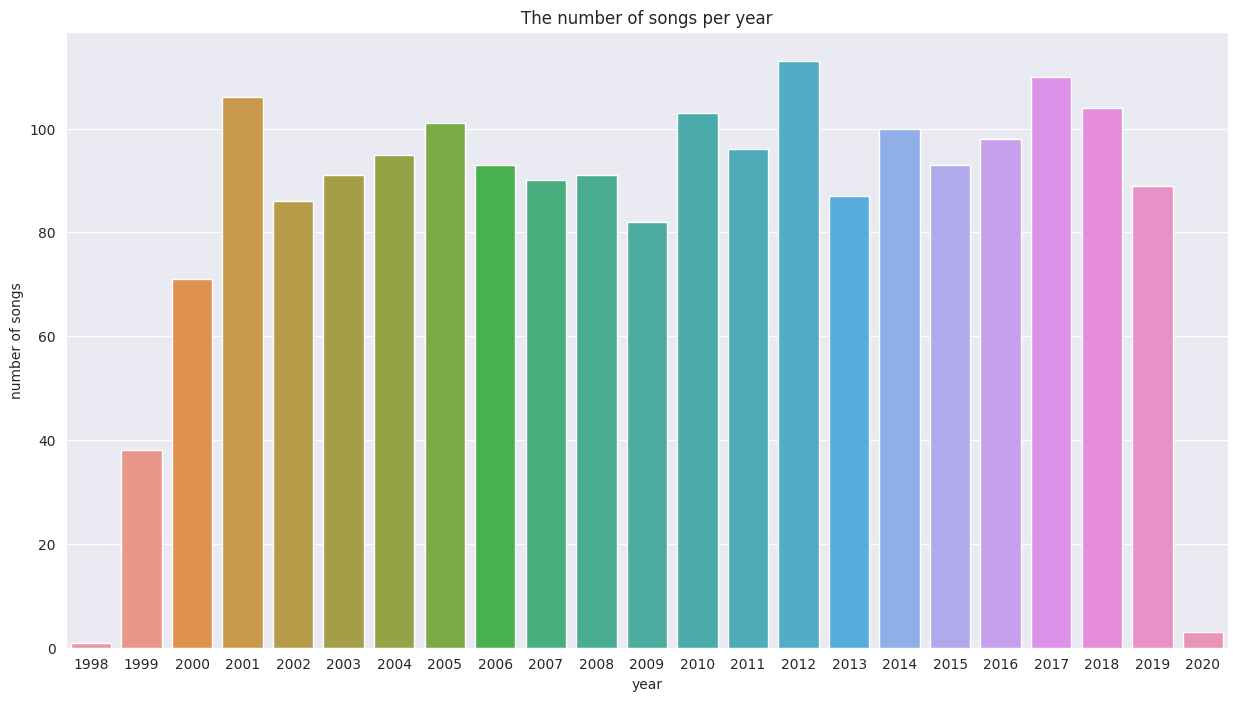

In [50]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,8))
sns.countplot(data = df, x = df.year)
plt.title('The number of songs per year')
plt.ylabel('number of songs')

In [51]:
df_num = df.select_dtypes('number')
df_num.head()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,0,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,0,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,0,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,0,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,0,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656


In [52]:
df_num.corr()

,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.119608,-0.318835,0.048140,-0.060083,-0.082982,-0.001353,-0.086226,-0.004095,0.062538,0.009960,-0.006409,0.022549,-0.116423,-0.033762
explicit,0.119608,1.000000,0.077361,0.047308,0.243799,-0.164212,0.001795,-0.091265,0.050653,0.415445,-0.028032,-0.082605,0.008238,-0.045397,0.014650
year,-0.318835,0.077361,1.000000,-0.007294,0.035444,-0.110265,0.008588,0.017228,-0.007208,0.003146,0.040698,-0.051490,-0.026418,-0.208410,0.077798
popularity,0.048140,0.047308,-0.007294,1.000000,-0.000143,-0.013404,0.013561,0.030441,-0.019430,0.021977,0.022501,-0.048104,-0.010291,-0.011012,0.011057
danceability,-0.060083,0.243799,0.035444,-0.000143,1.000000,-0.103204,0.035747,-0.035638,-0.068643,0.140955,-0.062374,0.021662,-0.127349,0.403787,-0.169074
energy,-0.082982,-0.164212,-0.110265,-0.013404,-0.103204,1.000000,-0.000642,0.651986,-0.044177,-0.058225,-0.447056,0.040662,0.153922,0.331756,0.152305
key,-0.001353,0.001795,0.008588,0.013561,0.035747,-0.000642,1.000000,-0.005229,-0.153319,0.003769,0.000719,-0.004053,-0.040827,0.035441,-0.009852
loudness,-0.086226,-0.091265,0.017228,0.030441,-0.035638,0.651986,-0.005229,1.000000,-0.027568,-0.081831,-0.312079,-0.103575,0.101972,0.228250,0.081655
mode,-0.004095,0.050653,-0.007208,-0.019430,-0.068643,-0.044177,-0.153319,-0.027568,1.000000,0.002192,0.009210,-0.036433,0.028334,-0.080279,0.047445
speechiness,0.062538,0.415445,0.003146,0.021977,0.140955,-0.058225,0.003769,-0.081831,0.002192,1.000000,0.002926,-0.062401,0.056532,0.069247,0.063192


Text(0.5, 1.0, 'Correlation Map')

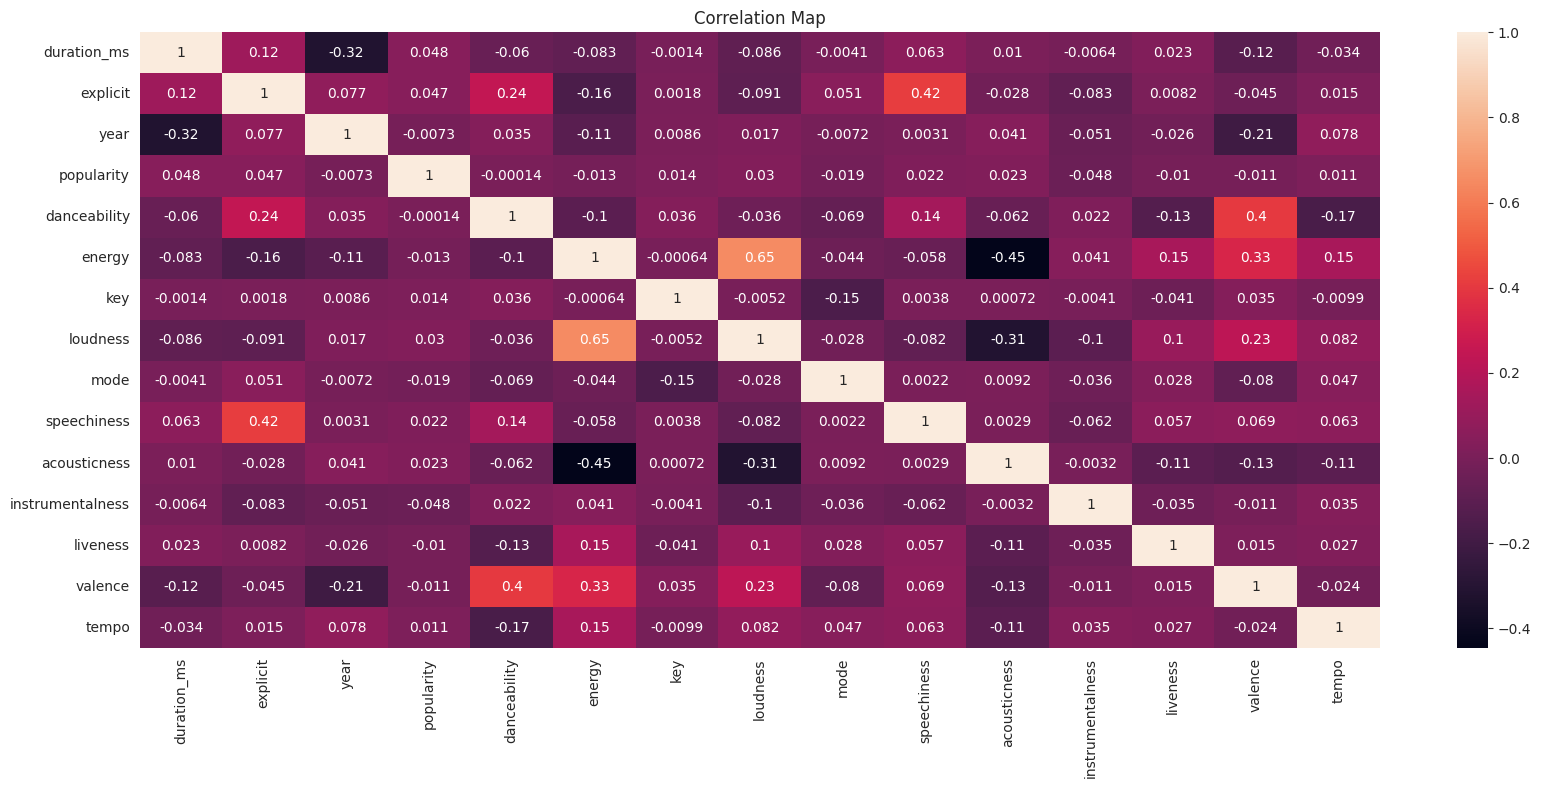

In [53]:
plt.figure(figsize = (20,8))
sns.heatmap(data = df_num.corr(), annot = True)
plt.title('Correlation Map')